# Сессия 3

---

### Импорт данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 3000

Перед началом работы необходимо импортировать данные

In [2]:
#Сдлеаю это при помощи read_csv
df = pd.read_csv("df.csv")
df.head()

,district_name,sidebar.id,payload.dt,sidebar.author_name,sidebar.latitude,sidebar.longitude,sidebar.full_address,sidebar.responsible.data.executor.organization_name,sidebar.responsible.data.executor.person_position,sidebar.responsible.data.executor.person_name,sidebar.responsible.data.executor.person_phone,sidebar.responsible.data.executor.person_email,sidebar.municipality.name,reason.name,reason.category.city_object.name,payload.body_answer,reason.category.name,appeal,clean_appeal,clean_sentence
0,Калининский,3137442,2021-01-27 22:09:26.995303,Яна П.,59.971194,30.369227,Неизвестно,"СПб ГКУ ""Центр комплексного благоустройства""",Заместитель директора,Нарджиева Наталья Николаевна,242-36-01,portal_ckb@guckb.spb.ru,муниципальный округ Финляндский округ,Неубранный снег на автомобильных дорогах и при...,Улица,Уважаемый пользователь.\r\n\r\nНа указанной в ...,Благоустройство,снег на дороге,['дорога'],дорога
1,Приморский,3255850,2021-03-11 16:33:11.600841,Мария К.,60.056312,30.267657,"муниципальный округ Коломяги, Орлово-Денисовск...",Администрация Приморского района,Заместитель главы администрации,Гырла Артем Ульянович,576-82-14,zhilprim@tuprim.gov.spb.ru,муниципальный округ Коломяги,Неисправный лифт,Дом,Уважаемый пользователь!\r\n\r\nРассмотрев Ваше...,Содержание МКД,5-ая парадная в пассажирском лифте не работает...,"['парадный', 'пассажирский', 'работать', 'кноп...",парадный пассажирский работать кнопка соответс...
2,Московский,3172877,2021-04-19 15:28:03.029719,Саакян С.,59.849036,30.324343,"г.Санкт-Петербург, Алтайская улица, дом 7, лит...",СПб ГКУ ЖА Московского района,директор,Блажис Виталий Степонасович,241-36-72,info@mskga.gugov.spb.ru,муниципальный округ Звездное,"Повреждение участков цоколя, отмостки, приямко...",Дом,Уважаемый пользователь!\n\nРассмотрев Ваше соо...,Фасад,Прошу удалить плесень,"['просить', 'удалить', 'плесень']",просить удалить плесень
3,Невский,3154575,2021-02-12 15:20:08.110145,Кирилл К.,59.898621,30.417794,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Невская застава,Несанкционированные надписи / объявления на со...,Сооружение,"Указанный пункт питания «Бол. Смоленский, 18» ...",Благоустройство,Требуется произвести работы по качественной за...,"['требоваться', 'произвести', 'работа', 'качес...",требоваться произвести работа качественный зак...
4,Кировский,2983860,2020-11-05 15:21:20.052509,Алекса Р.,59.892011,30.267384,"г.Санкт-Петербург, Севастопольская улица, дом ...",СПб ГКУ ЖА Кировского района,Заместитель директора,Грибанова Мария Николаевна,5761499,guzhakir@gmail.com,муниципальный округ Нарвский округ,Повреждение кровли,Дом,Уважаемый Пользователь!\nРассмотрев Ваше сообщ...,Кровля,сорван отлив окна.\nнеобходимо восстановить,"['сорвать', 'отлив', 'окнанеобходимый', 'восст...",сорвать отлив окнанеобходимый восстановить


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21309 entries, 0 to 21308
Data columns (total 20 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   district_name                                        21309 non-null  object 
 1   sidebar.id                                           21309 non-null  int64  
 2   payload.dt                                           21309 non-null  object 
 3   sidebar.author_name                                  21309 non-null  object 
 4   sidebar.latitude                                     21309 non-null  float64
 5   sidebar.longitude                                    21309 non-null  float64
 6   sidebar.full_address                                 21309 non-null  object 
 7   sidebar.responsible.data.executor.organization_name  21309 non-null  object 
 8   sidebar.responsible.data.executor.person_position    21309 non-nul

При экспорте 2 атрибута стали object вместо list и datetime

In [4]:
#Конвертация object в list
df["clean_appeal"] = df["clean_appeal"].apply(lambda x: x.replace("'", "").strip('][').split(', '))

In [5]:
df['payload.dt']=pd.to_datetime(df['payload.dt'])

In [6]:
df = df.dropna(axis='index', how='any', subset=['clean_sentence'])

In [7]:
df.head()

,district_name,sidebar.id,payload.dt,sidebar.author_name,sidebar.latitude,sidebar.longitude,sidebar.full_address,sidebar.responsible.data.executor.organization_name,sidebar.responsible.data.executor.person_position,sidebar.responsible.data.executor.person_name,sidebar.responsible.data.executor.person_phone,sidebar.responsible.data.executor.person_email,sidebar.municipality.name,reason.name,reason.category.city_object.name,payload.body_answer,reason.category.name,appeal,clean_appeal,clean_sentence
0,Калининский,3137442,2021-01-27 22:09:26.995303,Яна П.,59.971194,30.369227,Неизвестно,"СПб ГКУ ""Центр комплексного благоустройства""",Заместитель директора,Нарджиева Наталья Николаевна,242-36-01,portal_ckb@guckb.spb.ru,муниципальный округ Финляндский округ,Неубранный снег на автомобильных дорогах и при...,Улица,Уважаемый пользователь.\r\n\r\nНа указанной в ...,Благоустройство,снег на дороге,[дорога],дорога
1,Приморский,3255850,2021-03-11 16:33:11.600841,Мария К.,60.056312,30.267657,"муниципальный округ Коломяги, Орлово-Денисовск...",Администрация Приморского района,Заместитель главы администрации,Гырла Артем Ульянович,576-82-14,zhilprim@tuprim.gov.spb.ru,муниципальный округ Коломяги,Неисправный лифт,Дом,Уважаемый пользователь!\r\n\r\nРассмотрев Ваше...,Содержание МКД,5-ая парадная в пассажирском лифте не работает...,"[парадный, пассажирский, работать, кнопка, соо...",парадный пассажирский работать кнопка соответс...
2,Московский,3172877,2021-04-19 15:28:03.029719,Саакян С.,59.849036,30.324343,"г.Санкт-Петербург, Алтайская улица, дом 7, лит...",СПб ГКУ ЖА Московского района,директор,Блажис Виталий Степонасович,241-36-72,info@mskga.gugov.spb.ru,муниципальный округ Звездное,"Повреждение участков цоколя, отмостки, приямко...",Дом,Уважаемый пользователь!\n\nРассмотрев Ваше соо...,Фасад,Прошу удалить плесень,"[просить, удалить, плесень]",просить удалить плесень
3,Невский,3154575,2021-02-12 15:20:08.110145,Кирилл К.,59.898621,30.417794,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,Неизвестно,муниципальный округ Невская застава,Несанкционированные надписи / объявления на со...,Сооружение,"Указанный пункт питания «Бол. Смоленский, 18» ...",Благоустройство,Требуется произвести работы по качественной за...,"[требоваться, произвести, работа, качественный...",требоваться произвести работа качественный зак...
4,Кировский,2983860,2020-11-05 15:21:20.052509,Алекса Р.,59.892011,30.267384,"г.Санкт-Петербург, Севастопольская улица, дом ...",СПб ГКУ ЖА Кировского района,Заместитель директора,Грибанова Мария Николаевна,5761499,guzhakir@gmail.com,муниципальный округ Нарвский округ,Повреждение кровли,Дом,Уважаемый Пользователь!\nРассмотрев Ваше сообщ...,Кровля,сорван отлив окна.\nнеобходимо восстановить,"[сорвать, отлив, окнанеобходимый, восстановить]",сорвать отлив окнанеобходимый восстановить


### 3.3. Тематическое моделирование

**Тематическое моделирование — способ построения модели коллекции текстовых документов, которая определяет, к каким темам относится каждый из документов**

**Для решения данной задачи будет выбранно 3 модели тематического моделирования:**
* NMF - Неотрицательная матричная факторизация. Находит две неотрицательные матрицы (W, H), произведение которых аппроксимирует неотрицательную матрицу X. Эту факторизацию можно использовать для реализации тематического моделирования
* LDA - Латентное распределение Дирихле часто используется для моделирования тем на основе содержания, что в основном означает изучение категорий текстов.
* LSI - Реализует быстрое усечение SVD (Singular Value Decomposition). Разложение SVD может быть обновлено новыми наблюдениями в любое время для онлайн-инкрементного обучения с эффективным использованием памяти

**Чтобы получить некоторые результаты, то воспользуемся способом столбчатой диаграммы. Данный способ будет использован, поскольку этого достаточно для вывода результатов весов слов при тематическом моделировании**

**Данные алгоритмы были взяты, поскольку они все имеют настройки жёсткости, которые можно использовать для оптимизации тематического моделирования. Оптимизация необходима, чтобы как можно эффективнее получить темы со стороны скорости, а также уникальности топиков**

**Первый метод взят, поскольку он имеет свойство уменьшения размерности входных корпусов, что позволяет экономить время затраченое на моделирование темы**

**Второй метод взят, поскольку каждый документ случайным образом инициализируйт каждое слово темой среди K тем, где K — количество предопределенных тем, тем самым позволяя получить вычислить случайные веса в качестве эксперимента**

**Третий метод взят, поскольку алгоритм LSI, с помощью разложения SVD, способен с крайне высокой эффективностью использовать память**



### Параметры тематического моделирования
В качестве параметров возьмём оптимальное количество тем - это 10, а также не более 10 слов для визуализации тематического моделирования

Иморт модулей

done in 0.001s.
Extracting tf-idf features for NMF...
done in 0.035s.
Extracting tf features for LDA...
done in 0.031s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.318s.


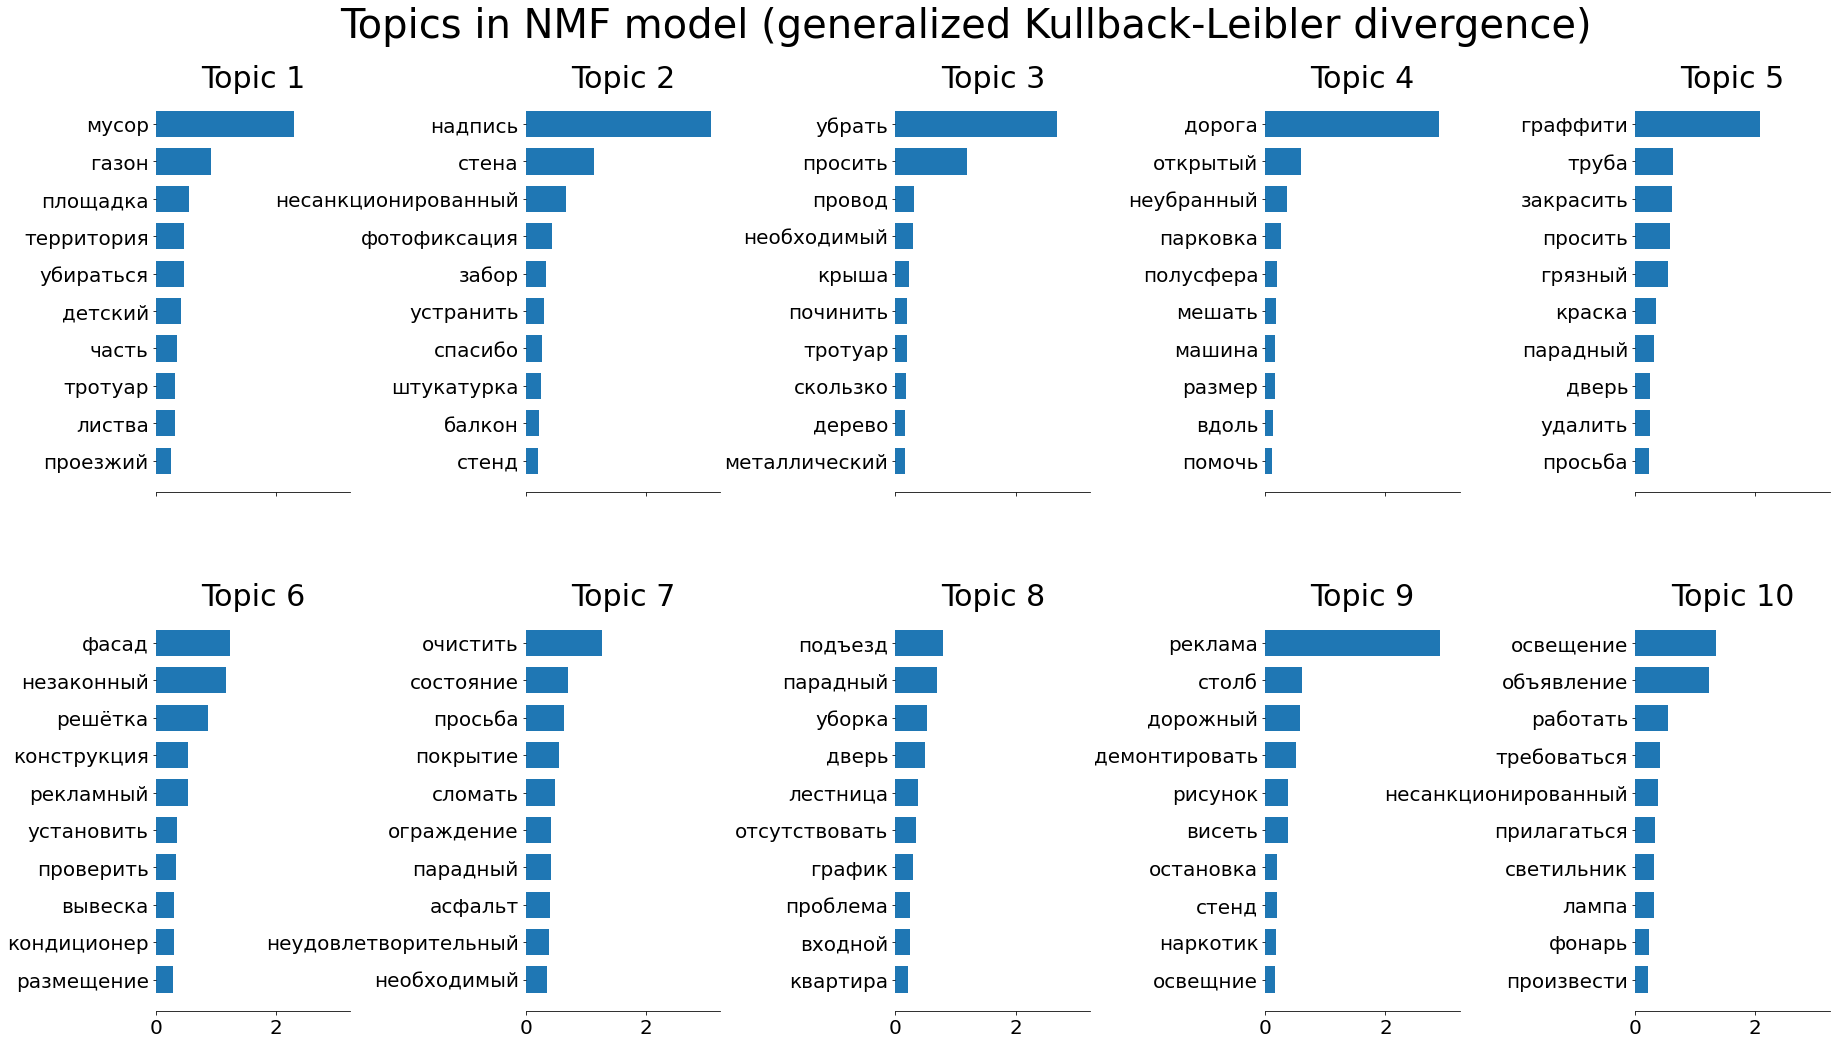



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 1.972s.


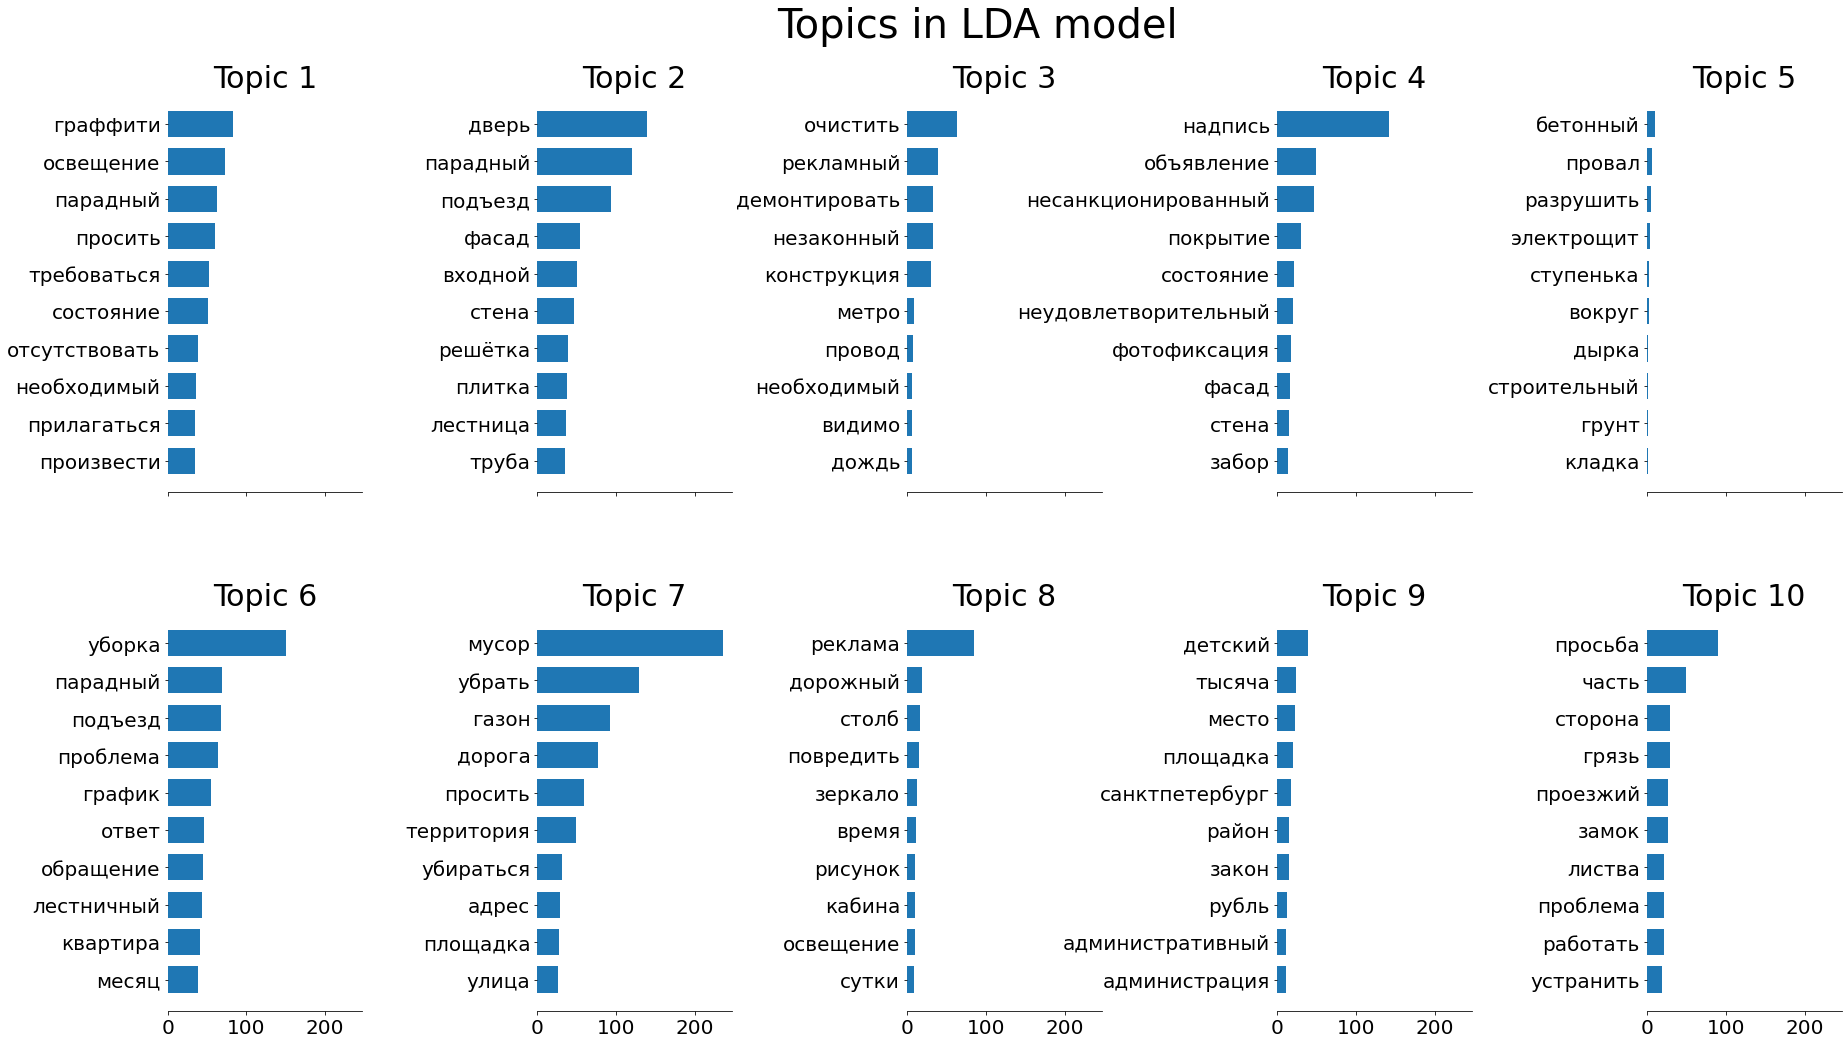

In [25]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 10


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

t0 = time()
data = df['clean_sentence']
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()


# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

### LSI

In [26]:
import gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim import corpora
from gensim.models import LsiModel

common_texts = df["clean_appeal"]
#Особенность этой модели заключается в использовании словарей
dictionary = corpora.Dictionary(common_texts)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in common_texts]

In [27]:
number_of_topics=10
words=10
#Созданеи модели
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)

Выведем найденные топики и их слова с весом который дал алгоритм:

In [28]:
from matplotlib import rcParams

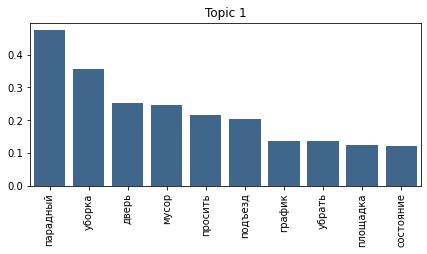

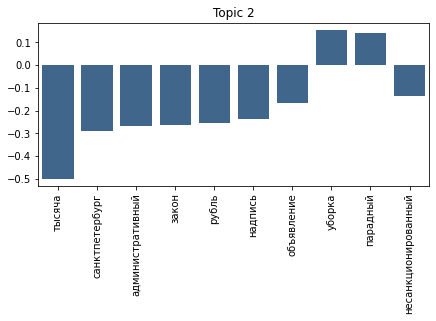

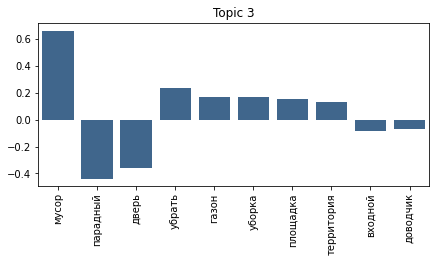

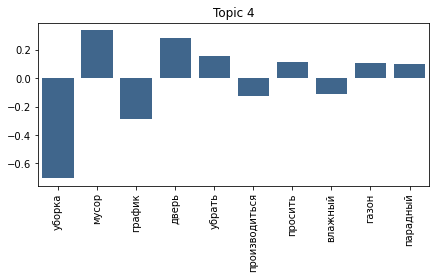

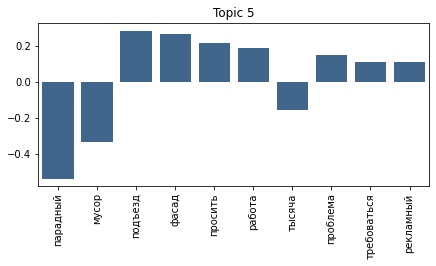

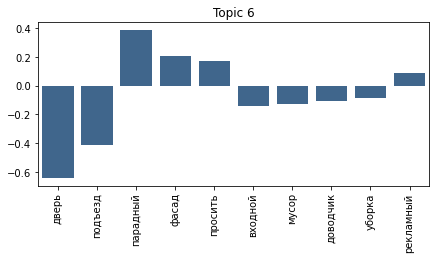

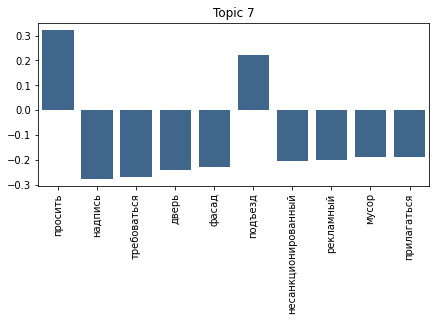

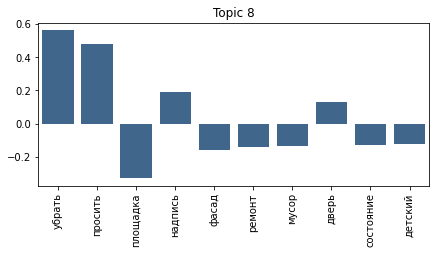

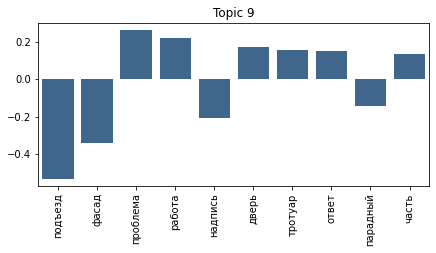

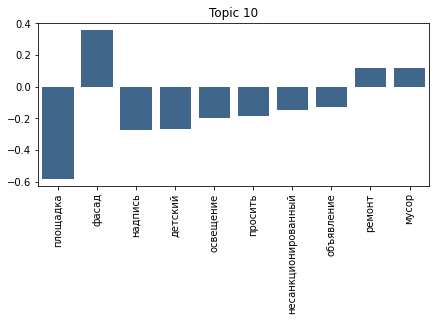

In [29]:
for index, topic in lsamodel.show_topics(formatted=False, num_words= 10):
    rcParams['figure.figsize'] = 7,3
    sns.barplot(list(dict(topic).keys()), list(dict(topic).values()), color=(0.2, 0.4, 0.6, 0.6))
    plt.xticks(rotation='vertical')
    plt.title('Topic ' + str(index+1))
    plt.show()

## Вывод по тематическому моделированию: 

Цель данной главы - это получение возможных топиков текста на основании меры TF-IDF их визуализации. В данном случае были построенны три модели тематического моделирования, а также визуализированны их слова с вессом, где вес слова вычислялся на основе действующего агоритма. 

**В случае, если результат весов отрицательный, то вероятнее всего это может произойти из-за частого использования данного слова, который для алгоритма начинает "обесцениваться"**